# Fourier Optics Numeric Homework #2: Fourier Propagation

Mark Brown  
September 14th, 2016

### Entire Problem Statement

In this assignment you will create a discrete, numerical optical diffraction tool using the FFT and the scalar transfer function of free space. It will use the coordinate systems and the FFT operator pairs you established in HW 1. The tool will be "1+1D", that is one transverse spatial dimension (x) and one propagation dimension (z). The technique generalizes trivially to 2+1D and 3+1D (e.g. see R. Mcleod, K. Wagner and S. Blair, 3+1 dimensional optical soliton dragging logic, Physical Review A 52, 3254-3278, 1995.)
1. Create a self-contained, callable function that accepts a monochromatic electric field vs. x on the boundary z=0 and returns e(x,z) at a set of specified z. Use the scalar, non-paraxial transfer function of free space to perform the calculation. Hint: you need only one forward Fourier transform. Let the space have a specified index of refraction $n$ which you pass as a variable. Calculate the total power at each plane z and plot it, remarking on any deviations from power conservation and the reasons for the same.
2. Validate your code by calling the function with the specified inputs and, to the extent possible, comparing (via overplots) the expected output calculated by the appropriate continuous theory.
    1. **Diffraction from a slit:** $e\{x\} = \text{rect}\{\frac{x}{L}\}$. We don't yet have the Fresnel and Fraunhofer approximations, so we can't yet calculate the expected $e\{x,z\}$ but make the plot $|e\{x,z\}|$ because it's pretty much THE classical fourier optics calculation. note the location in z of the near-field boundary $L^2/\lambda$ and remark if this seems to be consisten with your calculation. Scale the boundary condition and space to avoid significant amplitude hitting the edges of the space. To make a quantitative check, plot the amplitude of $E$ versus angle in the far field from your numerical calculation and compare this to the expected continuous function. Note that this is easier than it might at first sound.  
    2. **Gaussian beam diffraction:** Let the boundary be a gaussian at the waist (that is, flat phase). Choose (and document your calculation) a gaussian waist size that will enable you to see noticable diffraction ($z_0$ is within your z distance, at least) and appropriately sampled in $x$. Compare your calculation to the amplitude and phase for a classical gaussian beam formula at the end of the grid in z. 
    3. **Boundary conditions:** The same as problem (b) but let the incident field be propagating at an angle $\theta$ with respect to the z axis. Confirm, in real and frequency space, that you have created the right boundary condition to get a specified $\theta$. Focus particularly on the sign of the angle - if you have a sign convention mistake, it's easy to get $-\theta$ when you wanted $\theta$. Choose $\theta$ and **L** such that you get minimal diffraction and let the beam hit the edge of your space. Explain the result.
    4. **Refraction at an index step:** Repeat (c) with a somewhat collimated beam in a space with index $n_1$. Use the fields at the final $z$ and pass them to a second simulation as the incident field but let the index of refraction be n2. Plot e(x,y) through a function like pcolor awith the second result appended to $z$ in the first. In real and frequency space, validate the change in angle versus your expectation. Comment on the |E| vs. spatial frequency plot before and after going through the index step.
    5. **Evanescent decay (total internal reflection):** Returning to (a), let the sampling dx be less than $\lambda/2$ such that evanescent spatial frequencies are included. First confirm that your simulation doesn't have exponential growth in power. If it does, you have sign convention conflict in your transfer function. Now plot the spectral power (that is, the magnitude of the field squared ina  single cell of the $E\{f_x\}$ array) in specific spatial frequencies, several less than cutoff and several beyond cutoff using an appropriate **z** sampling grid. Hint: You know what an "appropriate" z distance should be if you understand evanescent decay. Overplot the epected behavior for each of these spatial frequencies using the transfer function.
    6. Extra credit: combine (d) and (e) to demonstrate frustrated total internal reflection (or "quantum tunneling" if you are a physicist) through a slab of material. Vary the angle of incidence, $\theta$, and plot the output power dependence with $\theta$. Compare to expectation.

### Includes and settings

In [1]:
import numpy as np
import matplotlib as mpl
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
import scipy.fftpack as FT
import math as m
import sys
%matplotlib inline
# set matplotlib plot defaults :D
# These values are nice for a dark theme.
mpl.rcParams['text.color'] = '#ffffff'
mpl.rcParams['figure.edgecolor'] = '#ffffff'
mpl.rcParams['xtick.color'] = '#ffffff'
mpl.rcParams['ytick.color'] = '#ffffff'
mpl.rcParams['figure.facecolor'] = '#000000'
mpl.rcParams['axes.facecolor'] = '#0a0a0a'
mpl.rcParams['figure.figsize'] = (18.0, 8.0)
mpl.rcParams['axes.labelcolor'] = '#ffffff'
mpl.rcParams['grid.color'] = '#aaaaff'
mpl.rcParams['axes.edgecolor'] = '#ffffff'
mpl.rcParams['legend.facecolor'] = '#0a0a0a'
mpl.rcParams['axes.grid'] = True
mpl.rcParams['axes.formatter.useoffset'] = False

In [2]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>

## Problem 1

### Problem Statement

1. Create a self-contained, callable function that accepts a monochromatic electric field vs. x on the boundary z=0 and returns e(x,z) at a set of specified z. Use the scalar, non-paraxial transfer function of free space to perform the calculation. Hint: you need only one forward Fourier transform. Let the space have a specified index of refraction $n$ which you pass as a variable. Calculate the total power at each plane z and plot it, remarking on any deviations from power conservation and the reasons for the same.


### Work

The operation I need to do is
$$
\text{propagate} = F^{-1}\{e^{ikz}F\{E\}\}
$$

#### Function Definition

In [3]:
def propagate(field, fieldPos, z_fin, wavelength, n=1):    
    """
    Note that this function assumes equal spacing of points.
    """
    assert(len(fieldPos) > 1)
    k = 2 * np.pi * n / wavelength
    # Important assumption in the following line.
    spacing = (max(fieldPos) - min(fieldPos))/(len(fieldPos) - 1)    
    freqs = FT.fftshift(FT.fftfreq(len(fieldPos), spacing))
    propFactor = np.exp(1j * k * z_fin *
                        np.sqrt((1 - (wavelength / n * freqs)**2).astype(complex)))
    fieldFFT = FT.fftshift(FT.fft(FT.ifftshift(field)))
    phaseTerm = propFactor #* spreadFactor
    propFieldFFT = fieldFFT * phaseTerm
    field = np.array([], dtype=complex)
    field = FT.fftshift(FT.ifft(FT.ifftshift(propFieldFFT)))
    return field

#### Power Test

spacing = 2.44081034904
spacing = 0.325441379871
spacing = 0.244081034904


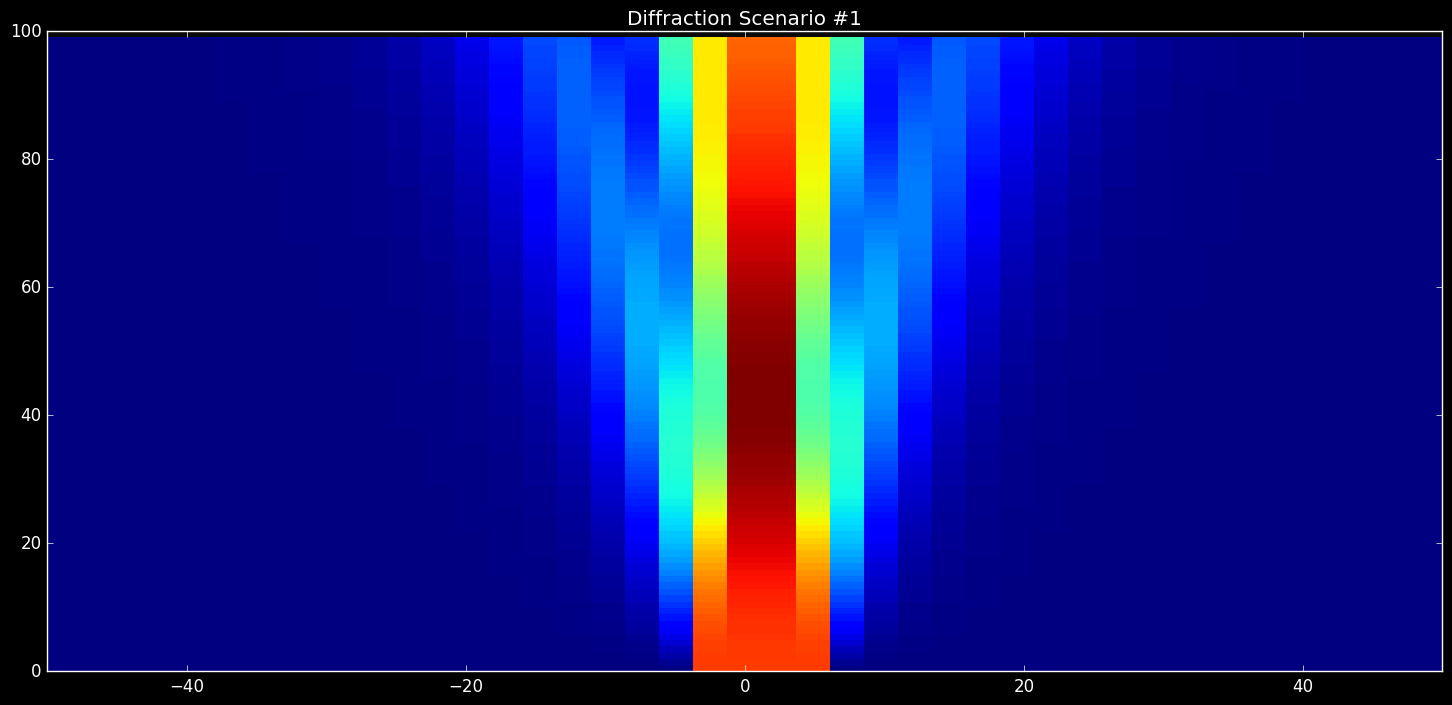

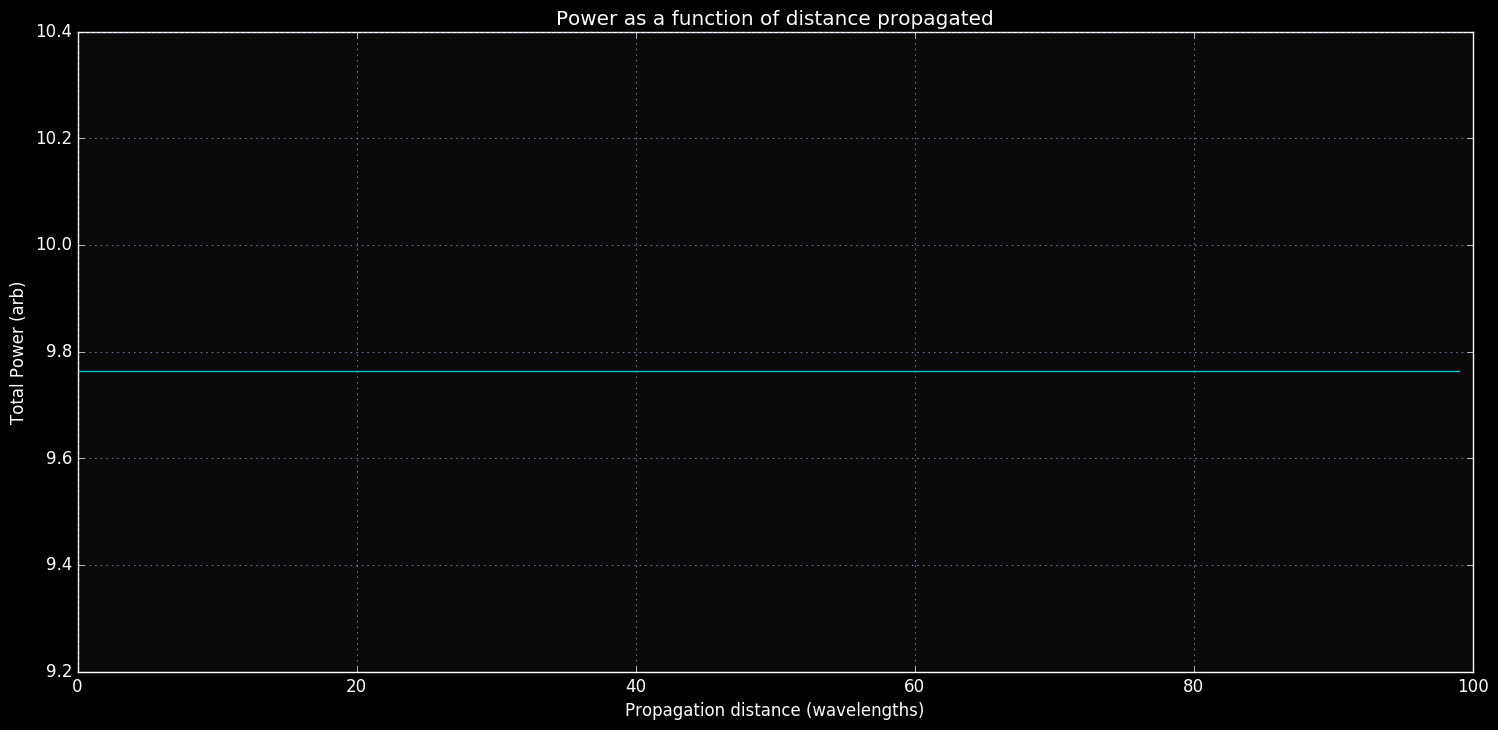

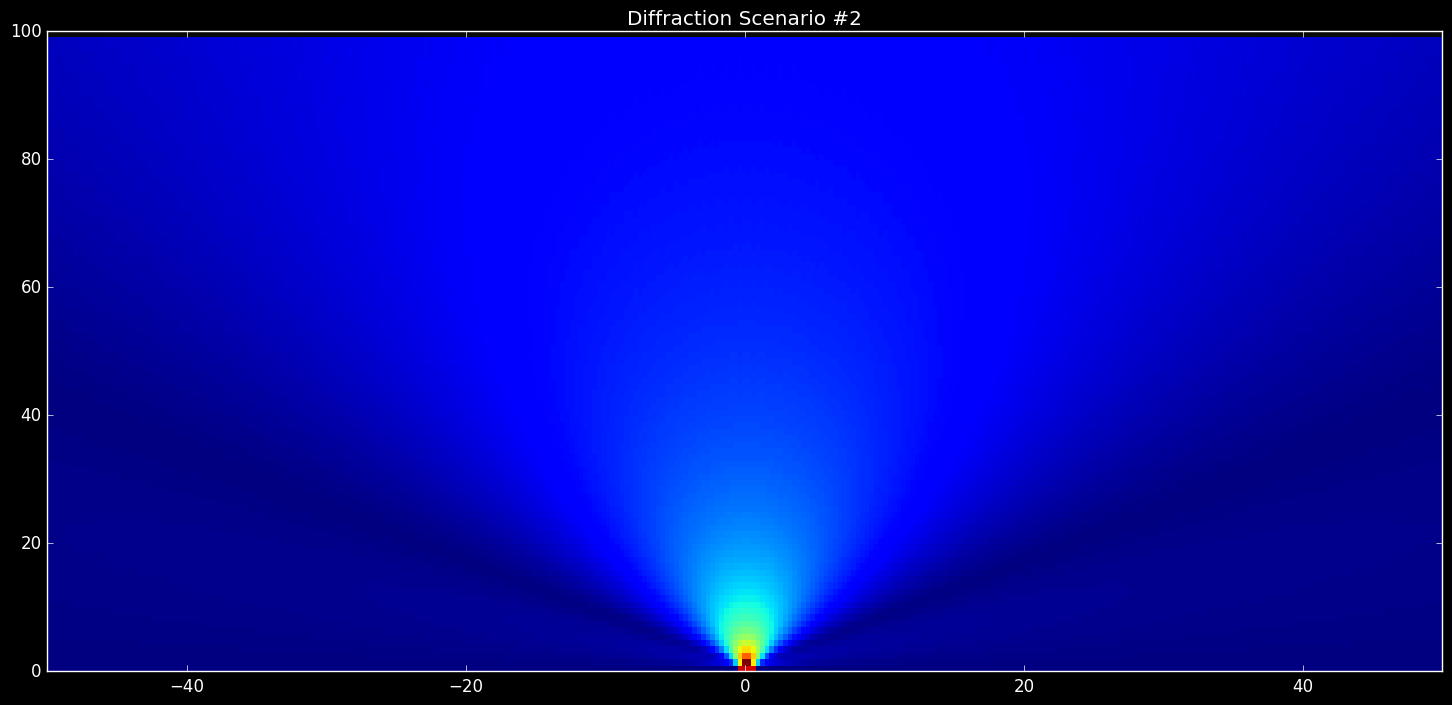

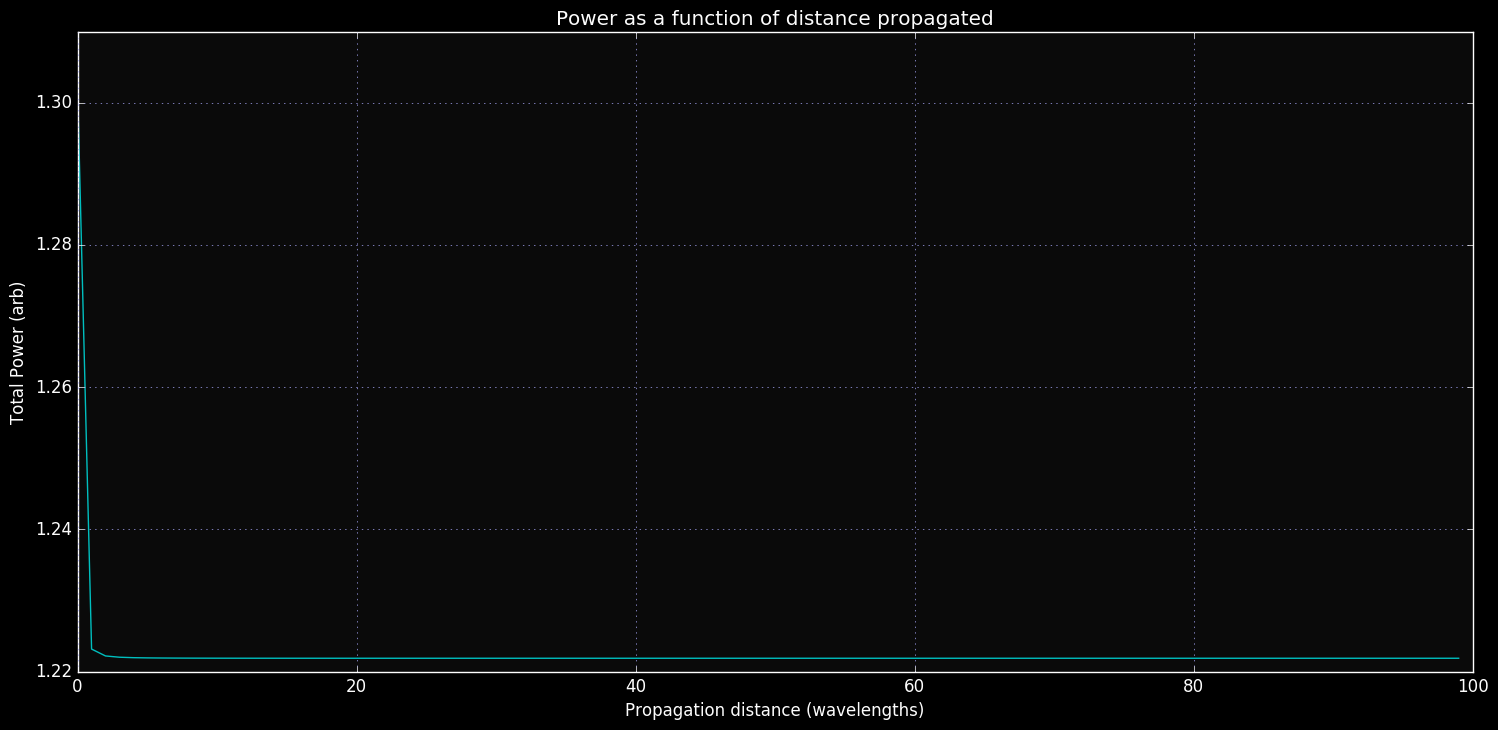

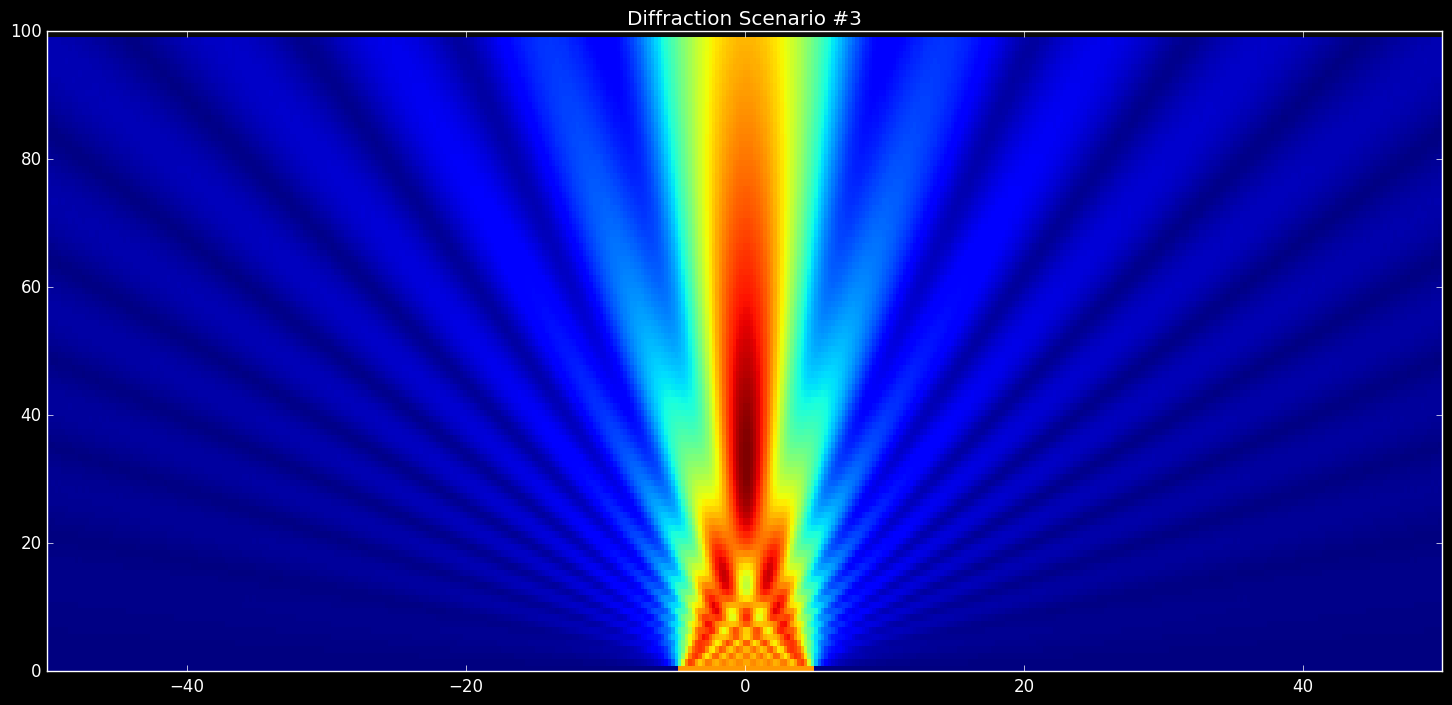

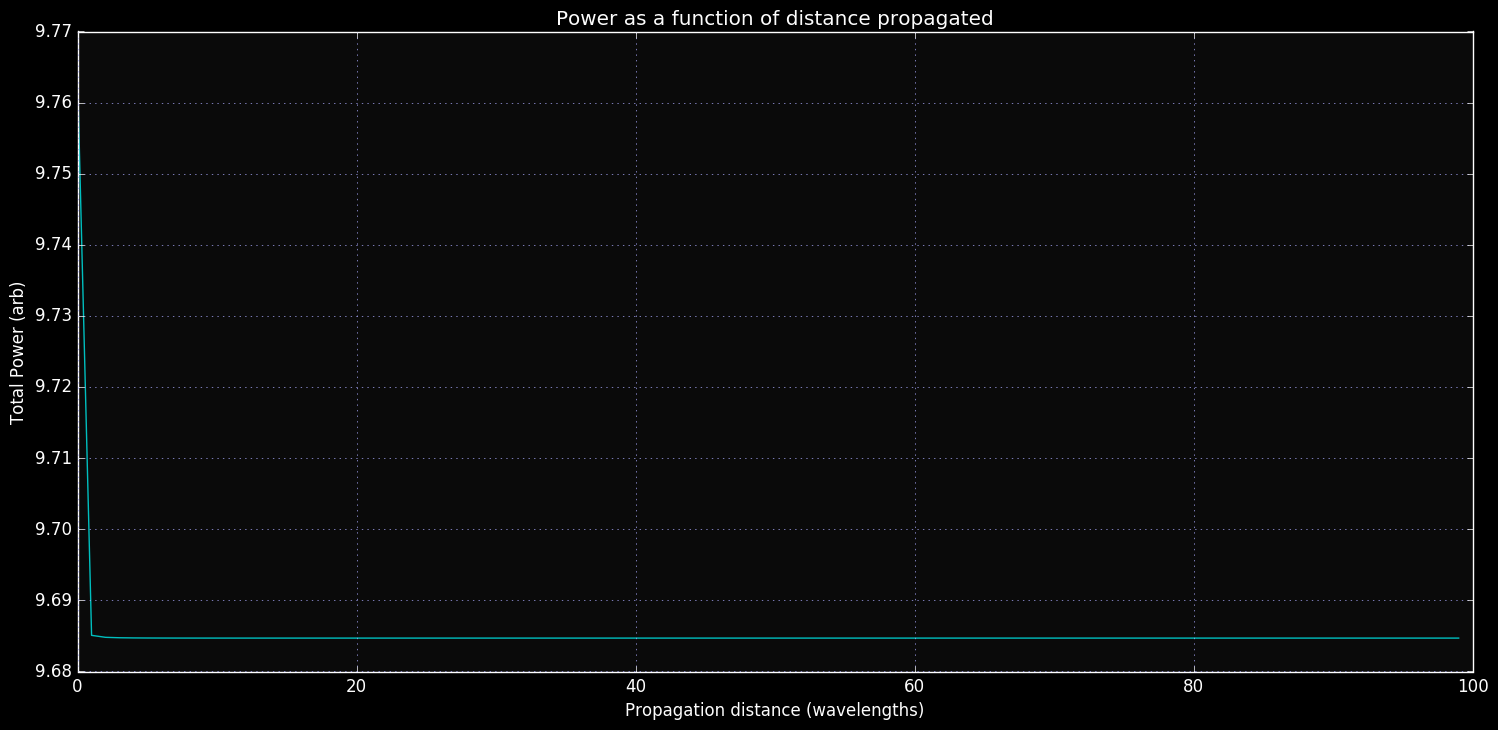

In [219]:
# using a square diffraction pattern. I picked this because it should have strong components at high
# frequencies, meaning that it will test the performance of my function over a good spectrum.
numberOfPoints = 2**12
#
triangleLength = 10
dataRange = 1000 * triangleLength
xpts = np.linspace(-dataRange / 2, dataRange / 2, numberOfPoints)
spacing = (max(xpts) - min(xpts))/(numberOfPoints + 1)
field0 = np.abs(xpts) < triangleLength / 2
wavelength = 1
plt.figure(1)
allData = np.zeros((100, numberOfPoints), dtype=complex)
positions = np.arange(0,100,1)
powers = np.zeros((100,1))
for pos in range(len(positions)):
    allData[pos] = propagate(field0, xpts, positions[pos], wavelength)
    powers[pos] = np.sum(abs(allData[pos])**2) * spacing
plt.pcolor(xpts, positions, abs(allData))
plt.title('Diffraction Scenario #1')
plt.xlim(-50,50)
plt.figure(2)
plt.plot(powers,'c')
plt.xlabel('Propagation distance (wavelengths)')
plt.ylabel('Total Power (arb)')
plt.title('Power as a function of distance propagated')
print('spacing = ' + str(spacing))
triangleLength = 4 / 3
dataRange = 1000 * triangleLength
xpts = np.linspace(-dataRange / 2, dataRange / 2, numberOfPoints)
spacing = (max(xpts) - min(xpts))/(numberOfPoints + 1)
field0 = np.abs(xpts) < triangleLength / 2
wavelength = 1
plt.figure(3)
allData = np.zeros((100, numberOfPoints), dtype=complex)
positions = np.arange(0,100,1)
powers = np.zeros((100,1))
for pos in range(len(positions)):
    allData[pos] = propagate(field0, xpts, positions[pos], wavelength)
    powers[pos] = np.sum(abs(allData[pos])**2) * spacing
plt.pcolor(xpts, positions, abs(allData))
plt.title('Diffraction Scenario #2')
plt.xlim(-50,50)
plt.figure(4)
plt.plot(powers,'c')
plt.xlabel('Propagation distance (wavelengths)')
plt.ylabel('Total Power (arb)')
plt.title('Power as a function of distance propagated')
print('spacing = ' + str(spacing))
####
triangleLength = 10
dataRange = 100 * triangleLength
xpts = np.linspace(-dataRange / 2, dataRange / 2, numberOfPoints)
spacing = (max(xpts) - min(xpts))/(numberOfPoints + 1)
field0 = np.abs(xpts) < triangleLength / 2
wavelength = 1
plt.figure(5)
allData = np.zeros((100, numberOfPoints), dtype=complex)
positions = np.arange(0,100,1)
powers = np.zeros((100,1))
for pos in range(len(positions)):
    allData[pos] = propagate(field0, xpts, positions[pos], wavelength)
    powers[pos] = np.sum(abs(allData[pos])**2) * spacing
plt.pcolor(xpts, positions, abs(allData))
plt.title('Diffraction Scenario #3')
plt.xlim(-50,50)
plt.figure(6)
plt.plot(powers,'c')
plt.xlabel('Propagation distance (wavelengths)')
plt.ylabel('Total Power (arb)')
plt.title('Power as a function of distance propagated')
print('spacing = ' + str(spacing))
plt.show()

## Problem #2

### Problem Statement

2. Validate your code by calling the function with the specified inputs and, to the exten possible, comparing (via overplots) the expected output calculated by the appropriate continuous theory.
    1. **Diffraction from a slit:** $e\{x\} = \text{rect}\{\frac{x}{L}\}$. We don't yet have the Fresnel and Fraunhofer approximations, so we can't yet calculate the expected $e\{x,z\}$ but make the plot $|e\{x,z\}|$ because it's pretty much THE classical fourier optics calculation. note the location in z of the near-field boundary $L^2/\lambda$ and remark if this seems to be consisten with your calculation. Scale the boundary condition and space to avoid significant amplitude hitting the edges of the space. To make a quantitative check, plot the amplitude of $E$ versus angle in the far field from your numerical calculation and compare this to the expected continuous function. Note that this is easier than it might at first sound.  
    2. **Gaussian beam diffraction:** Let the boundary be a gaussian at the waist (that is, flat phase). Choose (and document your calculation) a gaussian waist size that will enable you to see noticable diffraction ($z_0$ is within your z distance, at least) and appropriately sampled in $x$. Compare your calculation to the amplitude and phase for a classical gaussian beam formula at the end of the grid in z. 
    3. **Boundary conditions:** The same as problem (b) but let the incident field be propagating at an angle $\theta$ with respect to the z axis. Confirm, in real and frequency space, that you have created the right boundary condition to get a specified $\theta$. Focus particularly on the sign of the angle - if you have a sign convention mistake, it's easy to get $-\theta$ when you wanted $\theta$. Choose $\theta$ and **L** such that you get minimal diffraction and let the beam hit the edge of your space. Explain the result.
    4. **Refraction at an index step:** Repeat (c) with a somewhat collimated beam in a space with index $n_1$. Use the fields at the final $z$ and pass them to a second simulation as the incident field but let the index of refraction be n2. Plot e(x,y) through a function like pcolor awith the second result appended to $z$ in the first. In real and frequency space, validate the change in angle versus your expectation. Comment on the |E| vs. spatial frequency plot before and after going through the index step.
    5. **Evanescent decay (total internal reflection):** Returning to (a), let the sampling dx be less than $\lambda/2$ such that evanescent spatial frequencies are included. First confirm that your simulation doesn't have exponential growth in power. If it does, you have sign convention conflict in your transfer function. Now plot the spectral power (that is, the magnitude of the field squared ina  single cell of the $E\{f_x\}$ array) in specific spatial frequencies, several less than cutoff and several beyond cutoff using an appropriate **z** sampling grid. Hint: You know what an "appropriate" z distance should be if you understand evanescent decay. Overplot the epected behavior for each of these spatial frequencies using the transfer function.
    6. Extra credit: combine (d) and (e) to demonstrate frustrated total internal reflection (or "quantum tunneling" if you are a physicist) through a slab of material. Vary the angle of incidence, $\theta$, and plot the output power dependence with $\theta$. Compare to expectation.
   

### Work

#### Diffraction from a slit

$e\{x\} = \text{rect}\{\frac{x}{L}\}$. We don't yet have the Fresnel and Fraunhofer approximations, so we can't yet calculate the expected $e\{x,z\}$ but make the plot $|e\{x,z\}|$ because it's pretty much THE classical fourier optics calculation. note the location in z of the near-field boundary $L^2/\lambda$ and remark if this seems to be consisten with your calculation. Scale the boundary condition and space to avoid significant amplitude hitting the edges of the space. To make a quantitative check, plot the amplitude of $E$ versus angle in the far field from your numerical calculation and compare this to the expected continuous function. Note that this is easier than it might at first sound.  

In [10]:
numberOfPoints = 2**16
#
triangleLength = 10
dataRange = 8000
xpts = np.linspace(-dataRange / 2, dataRange / 2, numberOfPoints)
spacing = (max(xpts) - min(xpts))/(numberOfPoints + 1)
field0 = np.abs(xpts) < triangleLength / 2
wavelength = 1


positions = np.arange(0, 100, 1)
allData = np.zeros((len(positions), numberOfPoints), dtype=complex)
for pos in range(len(positions)):
    allData[pos] = propagate(field0, xpts, positions[pos], wavelength)
finAngles = np.arctan(xpts/max(positions))

spacing = 0.122068449883


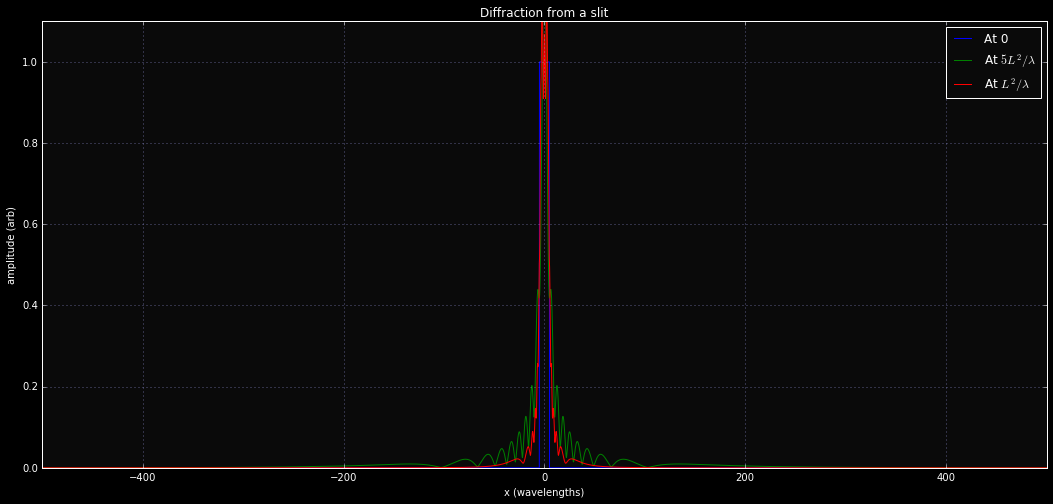

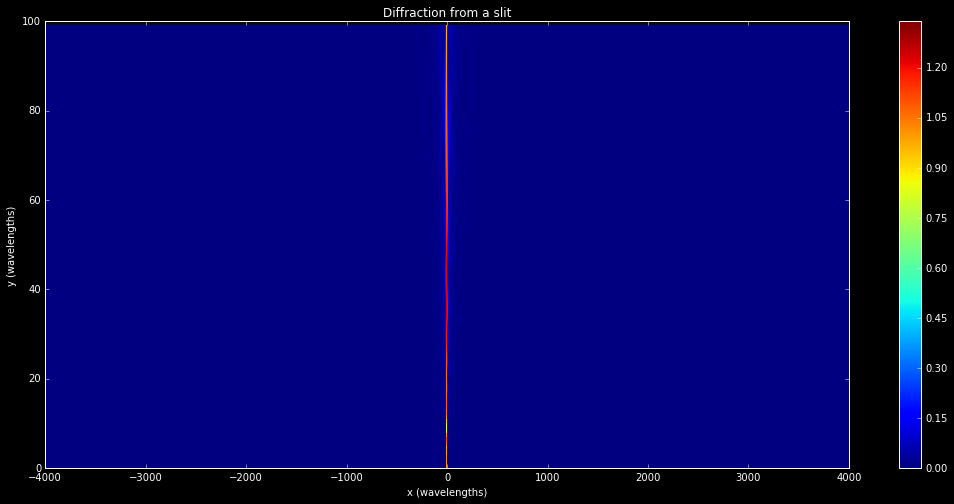

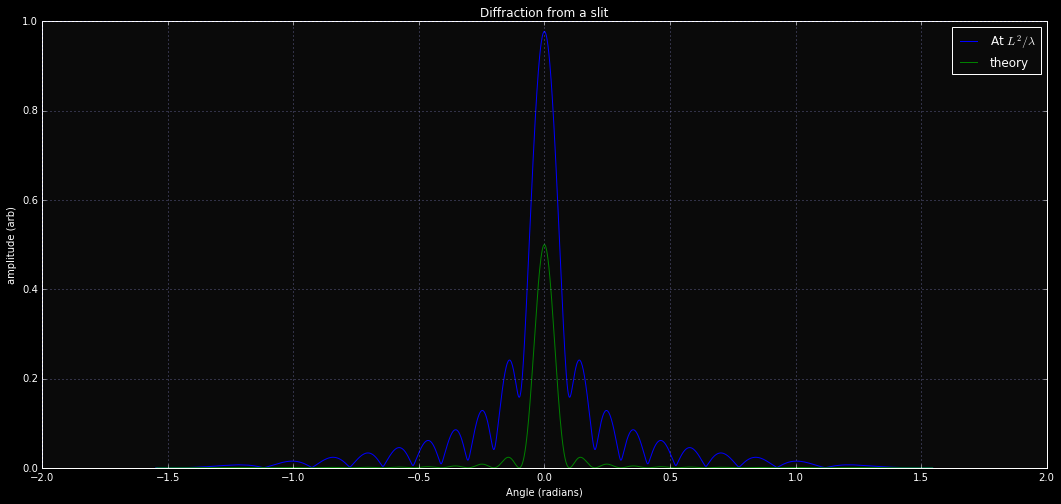

In [12]:
plt.figure(1)
plt.plot(xpts, abs(allData[0]), label='At 0')
plt.plot(xpts, abs(allData[50]), label='At $5{L^2}/{\lambda}$')
plt.plot(xpts, abs(allData[10]), label='At ${L^2}/{\lambda}$')
plt.legend()
plt.ylim(0,1.1)
plt.xlim(-500,500)
plt.xlabel('x (wavelengths)')
plt.ylabel('amplitude (arb)')
plt.title('Diffraction from a slit')
plt.figure(2)
#ax = plt.subplot(111)
plt.pcolormesh(xpts, positions, abs(allData))
plt.xlabel('x (wavelengths)')
plt.ylabel('y (wavelengths)')
plt.colorbar()
plt.axhline(triangleLength**2, color="#FFFFFF")
plt.title('Diffraction from a slit')
#plt.xlim(-50, 50)
print('spacing = ' + str(spacing))
plt.figure(3)
theory = (np.sinc(triangleLength * np.sin(finAngles)/wavelength))**2
plt.plot(finAngles, abs(allData[-1]), label='At ${L^2}/{\lambda}$')
#plt.plot(finAngles, abs(allData[9]), label='At ${L^2}/{\lambda}$')
plt.plot(finAngles, 0.5*theory, label='theory')
plt.xlabel('Angle (radians)')
plt.ylabel('amplitude (arb)')
plt.title('Diffraction from a slit')
plt.legend()

plt.show()

#### Gaussian

The same as problem (b) but let the incident field be propagating at an angle $\theta$ with respect to the z axis. Confirm, in real and frequency space, that you have created the right boundary condition to get a specified $\theta$. Focus particularly on the sign of the angle - if you have a sign convention mistake, it's easy to get $-\theta$ when you wanted $\theta$. Choose $\theta$ and **L** such that you get minimal diffraction and let the beam hit the edge of your space. Explain the result.

In [14]:
numberOfPoints = 2**16
waist = 3
wavelength = 1
amp = 1
xData = np.linspace(-10*waist, 10*waist, numberOfPoints)
field0 = amp * np.exp(-xData**2 / waist**2)
wavelength = 1
positions = np.arange(0, 100, 1)

allData = np.zeros((len(positions), numberOfPoints), dtype=complex)
for pos in range(len(positions)):
    allData[pos] = propagate(field0, xData, positions[pos], wavelength)
    #plt.plot(xData,abs(fieldz))
rayleighRange = (np.pi*waist**2 / wavelength)
theory = waist * np.sqrt(1+(positions/rayleighRange)**2)



ValueError: You passed in an invalid linestyle, `o`.  See docs of Line2D.set_linestyle for valid values.

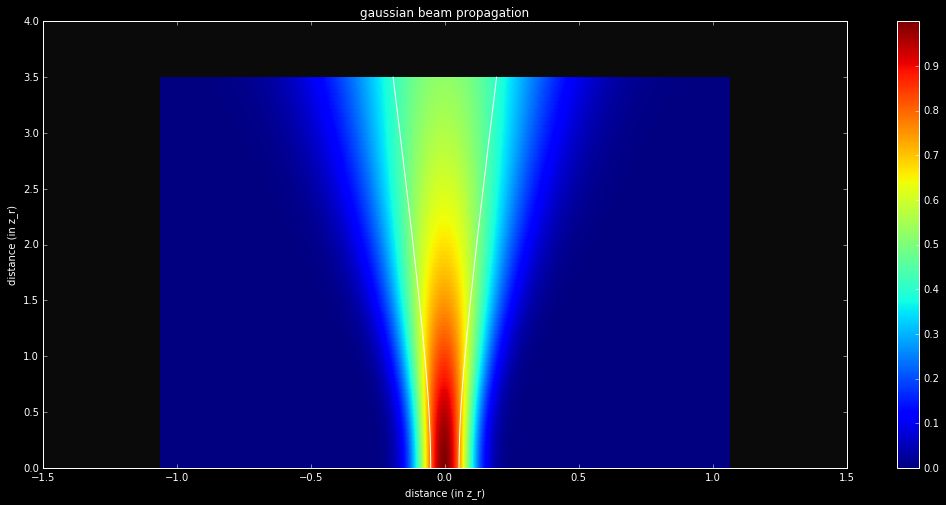

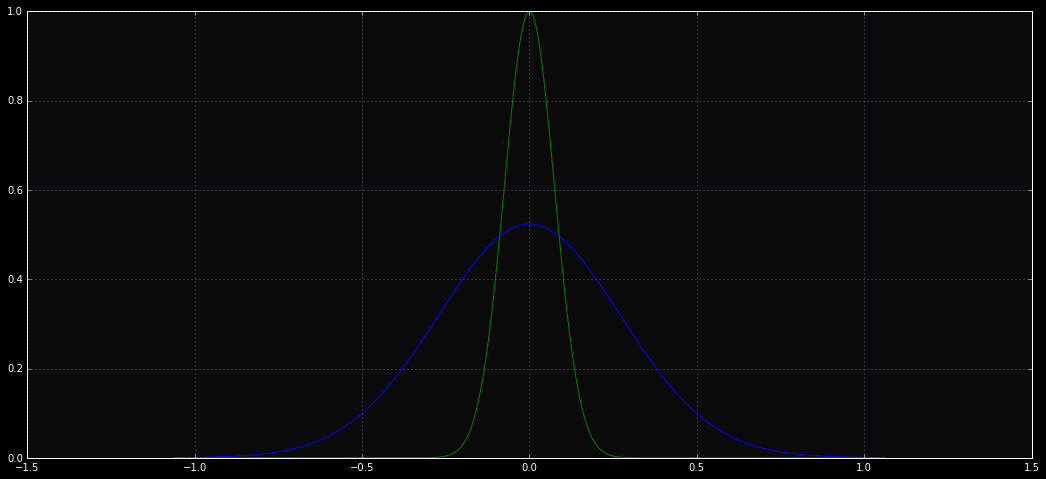

In [15]:
plt.pcolormesh(xData/rayleighRange, positions/rayleighRange, abs(allData))
plt.plot(theory/(2*rayleighRange), positions/rayleighRange, color='#FFFFFF')
plt.plot(-theory/(2*rayleighRange), positions/rayleighRange, color='#FFFFFF')
plt.xlabel('distance (in z_r)')
plt.ylabel('distance (in z_r)')
plt.title('gaussian beam propagation')
plt.colorbar()
plt.figure(2)
plt.plot(xData/rayleighRange, abs(allData[-1]), label='$' + str(max(positions)/rayleighRange) + "*z_r$")
plt.plot(xData/rayleighRange, abs(allData[0]), label='origin')
plt.plot(xData/rayleighRange, max(abs(allData[-1]))*np.exp(-xData**2/max(theory)**2), linestyle='o', color='#FFFFFF', label='Theory')
plt.xlabel('distance (in z_r)')
plt.ylabel('amplitude (Arb)')
plt.title('gaussian beam propagation')
plt.legend()
plt.show()

#### Angled Gaussian

The same as problem (b) but let the incident field be propagating at an angle $\theta$ with respect to the z axis. Confirm, in real and frequency space, that you have created the right boundary condition to get a specified $\theta$. Focus particularly on the sign of the angle - if you have a sign convention mistake, it's easy to get $-\theta$ when you wanted $\theta$. Choose $\theta$ and **L** such that you get minimal diffraction and let the beam hit the edge of your space. Explain the result.

In [5]:
numberOfPoints = 2**16
waist = 3
wavelength = 0.1
angle = np.pi * 3 / 5
amp = 1
pos = 10

k = 2 * np.pi / wavelength
xData = np.linspace(-30*waist, 30*waist, numberOfPoints)
# extra factor of e^ikr
field0 = amp * np.exp(-xData**2/waist**2) * np.exp(1j * xData * k * np.sin(angle))
positions = np.arange(0, 100, 0.5)
allData = np.zeros((len(positions), numberOfPoints), dtype=complex)
for pos in range(len(positions)):
    allData[pos] = propagate(field0, xData, positions[pos], wavelength)
rayleighRange = (np.pi*waist**2 / wavelength)
theory = waist * np.sqrt(1+(positions/rayleighRange)**2)

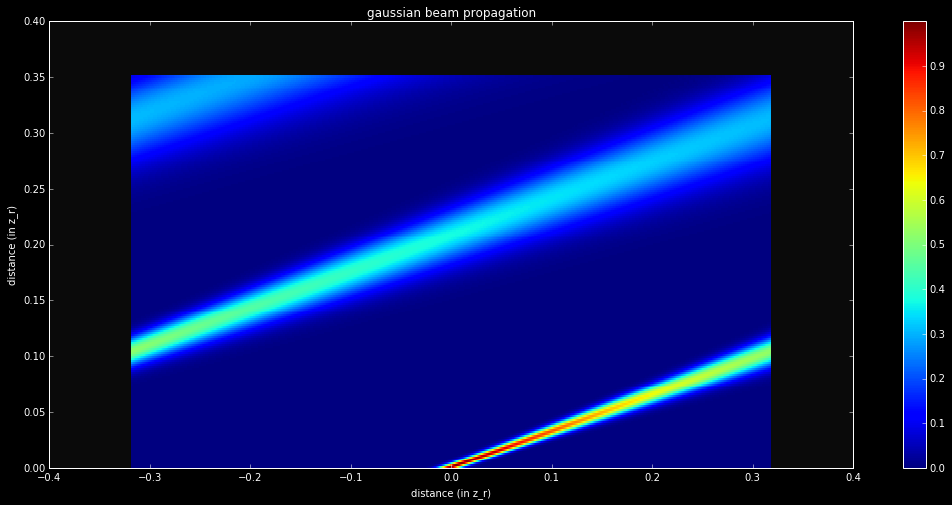

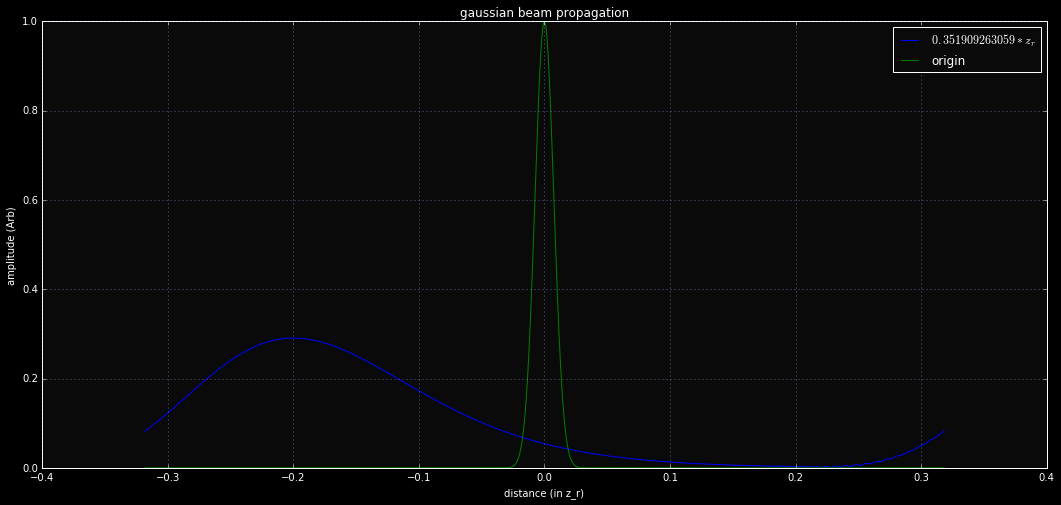

In [6]:
plt.pcolormesh(xData/rayleighRange, positions/rayleighRange, abs(allData))
#plt.plot(theory/(2*rayleighRange), positions/rayleighRange, color='#FFFFFF')
#plt.plot(-theory/(2*rayleighRange), positions/rayleighRange, color='#FFFFFF')
plt.xlabel('distance (in z_r)')
plt.ylabel('distance (in z_r)')
plt.title('gaussian beam propagation')
plt.colorbar()
plt.figure(2)
plt.plot(xData/rayleighRange, abs(allData[-1]), label='$' + str(max(positions)/rayleighRange) + "*z_r$")
plt.plot(xData/rayleighRange, abs(allData[0]), label='origin')
#plt.plot(xData/rayleighRange, max(abs(allData[-1]))*np.exp(-xData**2/max(theory)**2), color='#FFFFFF', label='Theory')
plt.xlabel('distance (in z_r)')
plt.ylabel('amplitude (Arb)')
plt.title('gaussian beam propagation')
plt.legend()
plt.show()

#### Refraction at an index step:

- **Refraction at an index step:** Repeat (c) with a somewhat collimated beam in a space with index $n_1$. Use the fields at the final $z$ and pass them to a second simulation as the incident field but let the index of refraction be n2. Plot e(x,y) through a function like pcolor awith the second result appended to $z$ in the first. In real and frequency space, validate the change in angle versus your expectation. Comment on the |E| vs. spatial frequency plot before and after going through the index step.

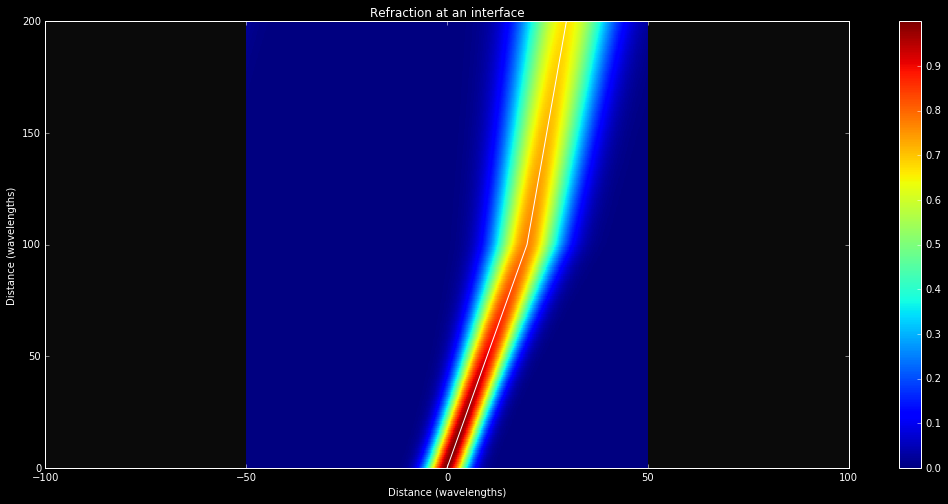

In [16]:
numberOfPoints = 2**10
waist = 5
wavelength = 1
angle = np.pi  / 16
amp = 1
k = 2 * np.pi / wavelength
xData = np.linspace(-10*waist, 10*waist, numberOfPoints)
# extra factor of e^ikr
field0 = amp * np.exp(-xData**2 / waist**2) * np.exp(1j * xData * k * np.sin(angle))
plt.figure(1)
y = np.linspace(0, 100, 101)
y2 = np.linspace(0, 100, 101)
allData = np.zeros((len(y) + len(y2), numberOfPoints), dtype=complex)
data1 = np.array([], dtype=complex)
for posInc in range(len(y)):
    pos = y[posInc]    
    data1 = propagate(field0, xData, pos, wavelength, n=1)
    allData[posInc] = data1
for posInc in range(len(y2)):
    pos = y2[posInc]
    data = propagate(data1, xData, pos, wavelength, n=2)
    allData[len(y) + posInc] = data

theory1x = positions*np.tan(angle)
plt.pcolormesh(xData, np.concatenate((y, max(y) + y2)), abs(allData))
plt.xlim(-100, 100)
plt.xlabel('Distance (wavelengths)')
plt.ylabel('Distance (wavelengths)')
plt.title('Refraction at an interface')
plt.colorbar()
theoryX = y*np.tan(angle)
theoryX2 = y2*np.tan(0.031099*np.pi) + max(theoryX)
plt.plot(np.concatenate((theoryX, theoryX2)),
         np.concatenate((y, max(y) + y2)),color='#FFFFFF')

plt.show()

#### Evanescent Decay

Returning to (a), let the sampling $dx$ be less than $\lambda/2$ such that evanescent spatial frequencies are included. First confirm that your simulation doesn't have exponential growth in power. If it does, you have sign convention conflict in your transfer function. Now plot the spectral power (that is, the magnitude of the field squared in a  single cell of the $E\{f_x\}$ array) in specific spatial frequencies, several less than cutoff and several beyond cutoff using an appropriate **z** sampling grid. Hint: You know what an "appropriate" z distance should be if you understand evanescent decay. Overplot the epected behavior for each of these spatial frequencies using the transfer function.

spacing = 2.44081034904
spacing = 0.244081034904


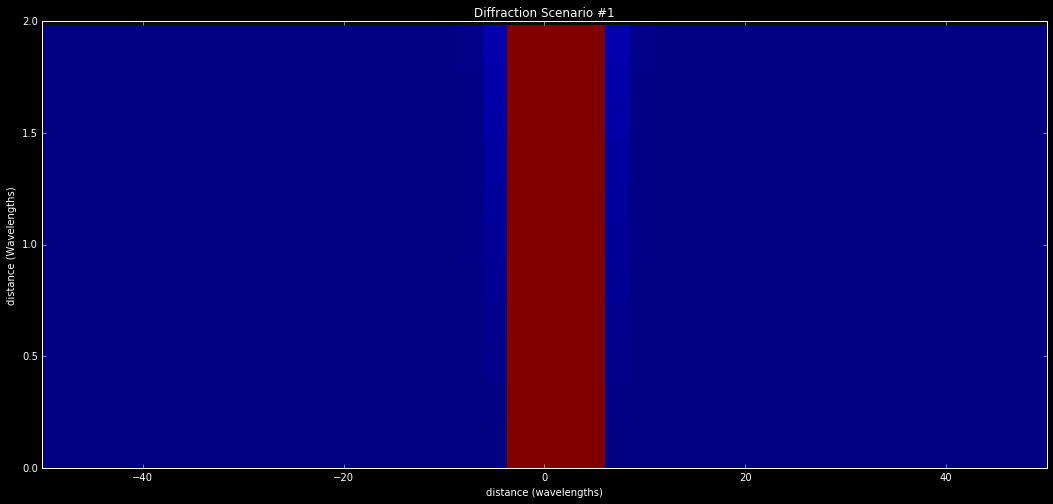

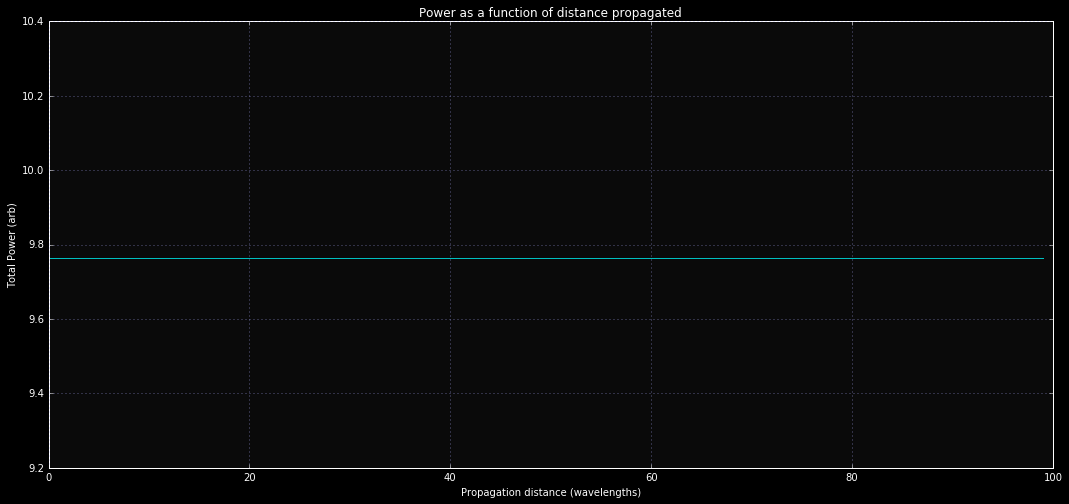

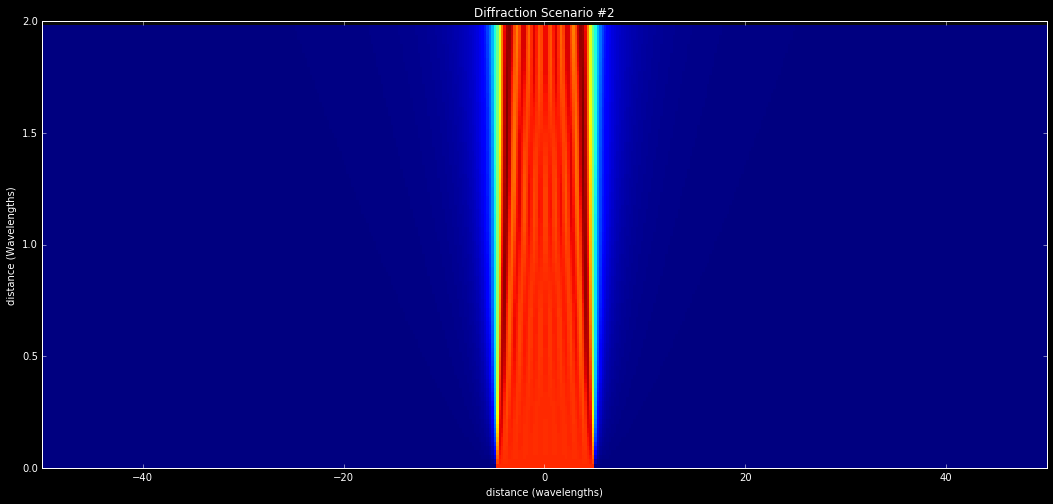

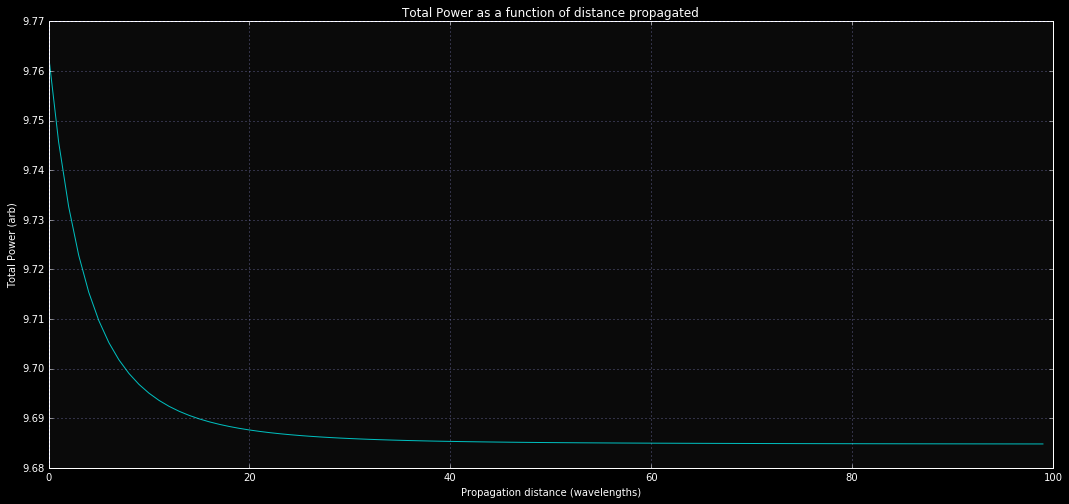

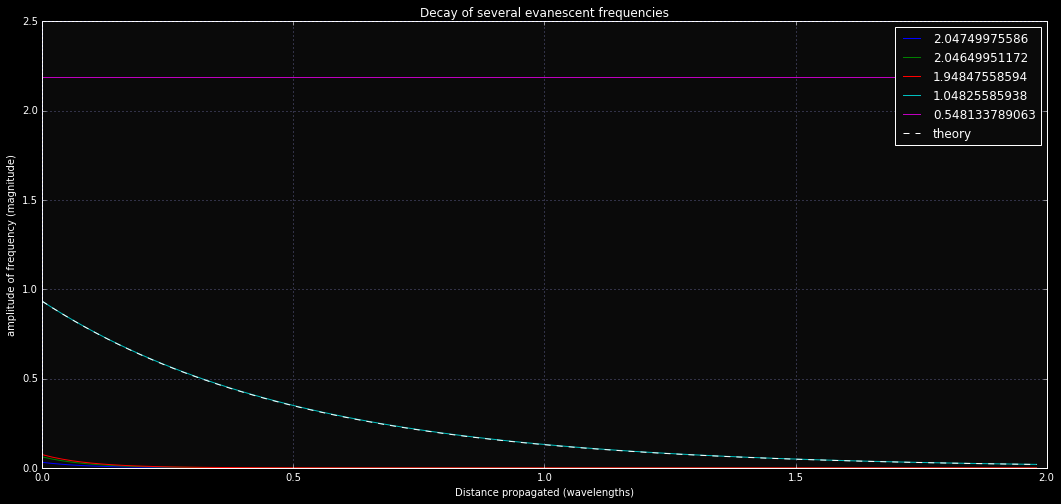

In [45]:
# using a square diffraction pattern. I picked this because it should have strong components at high
# frequencies, meaning that it will test the performance of my function over a good spectrum.
numberOfPoints = 2**12
#
triangleLength = 10
dataRange = 1000 * triangleLength
xpts = np.linspace(-dataRange / 2, dataRange / 2, numberOfPoints)
spacing = (max(xpts) - min(xpts))/(numberOfPoints + 1)
field0 = np.abs(xpts) < triangleLength / 2
wavelength = 1
plt.figure(1)
allData = np.zeros((100, numberOfPoints), dtype=complex)
positions = np.arange(0,2,0.02)
powers = np.zeros((100,1))
for pos in range(len(positions)):
    allData[pos] = propagate(field0, xpts, positions[pos], wavelength)
    powers[pos] = np.sum(abs(allData[pos])**2) * spacing
plt.pcolormesh(xpts, positions, abs(allData))
plt.title('Diffraction Scenario #1')
plt.xlim(-50,50)
plt.xlabel('distance (wavelengths)')
plt.ylabel('distance (Wavelengths)')
plt.figure(2)
plt.plot(powers,'c')
plt.xlabel('Propagation distance (wavelengths)')
plt.ylabel('Total Power (arb)')
plt.title('Power as a function of distance propagated')
print('spacing = ' + str(spacing))
####
triangleLength = 10
dataRange = 100 * triangleLength
xpts = np.linspace(-dataRange / 2, dataRange / 2, numberOfPoints)
spacing = (max(xpts) - min(xpts))/(numberOfPoints + 1)
field0 = np.abs(xpts) < triangleLength / 2
wavelength = 1
allData = np.zeros((len(positions), numberOfPoints), dtype=complex)
allFreqsAmps = np.zeros((len(positions), numberOfPoints), dtype=complex)
powers = np.zeros((len(positions),1))
highestFreqAmp = np.zeros((len(positions),1))
secondHighest = np.zeros((len(positions),1))
fftXData = FT.fftshift(FT.fftfreq(numberOfPoints, spacing))
for pos in range(len(positions)):
    allData[pos] = propagate(field0, xpts, positions[pos], wavelength)
    powers[pos] = np.sum(abs(allData[pos])**2) * spacing
    # get the ampliude of the highest frequency
    allFreqsAmps[pos] = FT.ifftshift(FT.fft(FT.fftshift(allData[pos])))
plt.figure(5)
plt.pcolormesh(xpts, positions, abs(allData))
plt.xlabel('distance (wavelengths)')
plt.ylabel('distance (Wavelengths)')
plt.title('Diffraction Scenario #2')
plt.xlim(-50,50)
plt.figure(6)
plt.plot(powers,'c')
plt.xlabel('Propagation distance (wavelengths)')
plt.ylabel('Total Power (arb)')
plt.title('Total Power as a function of distance propagated')
print('spacing = ' + str(spacing))
plt.figure(7)
plt.plot(positions, abs(allFreqsAmps[:,-1]), label=str(fftXData[-1]))
plt.plot(positions, abs(allFreqsAmps[:,-2]), label=str(fftXData[-2]))
plt.plot(positions, abs(allFreqsAmps[:,-100]), label=str(fftXData[-100]))
plt.plot(positions, abs(allFreqsAmps[:,-1000]), label=str(fftXData[-1000]))
plt.plot(positions, abs(allFreqsAmps[:,-1500]), label=str(fftXData[-1500]))

plt.title('Decay of several evanescent frequencies')
plt.xlabel('Distance propagated (wavelengths)')
plt.ylabel('amplitude of frequency (magnitude)')
theory = (max(allFreqsAmps[:,-1000]) 
          * np.exp(1j * k * positions *
                  np.sqrt((1 - (wavelength * fftXData[-1000])**2).astype(complex))))
plt.plot(positions, abs(theory), linestyle='--', color='#FFFFFF', label='theory')
plt.legend()
plt.show()